# Data Analytics Data Preparation and Association Rule Mining
### In this project I do the following:
- Analyze employee_attrition.csv dataset. This dataset provides a variety of information about employees, such as demographics, time on job, etc. and also if they stay with or leave the company(as in binary attribute “Attrition” with No means stay and Yes means leaving).
- Utilize the CRISP-DM process
- Data preprocessing, cleaning, transformation: potential data quality issues and properly address those issues as part of data preparation.
- exploratory data analysis (EDA): descriptive statistics and apply data visualization to check for interesting data patterns.
- Run association rule mining algorithm using default settings as a baseline model.
- Fine tune the model by experimenting with different algorithm hyper-parameters and discuss how tuning those hyper-parameters could impact the model performance (e.g. overfitting or underfiting).
- Output and present the most interesting and significant rules which could predict “Attrition”; print out the top 5 rules which predict those who stay vs. who leave, respectively.
- Provide interpretations of the above chosen association rules and also discuss why you consider them interesting and significant.

In [1]:
#importing the necessary packages for our analysis 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns
import apyori as ap
from apyori import apriori #Apriori Algorithm
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder #Apriori Algorithm
import plotly.express as px
import pandas.util.testing as tm

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/Users/ryanondocin/Desktop/employee_attrition_final.csv') #reading in our attrition csv using pandas
df.head(10) #displaying the head of our dataframe

Age Attrition BusinessTravel  DailyRate              Department  \
0   30        No  Travel_Rarely       1358                   Sales   
1   52        No  Travel_Rarely       1325  Research & Development   
2   42        No  Travel_Rarely        462                   Sales   
3   55        No     Non-Travel        177  Research & Development   
4   35        No  Travel_Rarely       1029  Research & Development   
5   51        No  Travel_Rarely       1318                   Sales   
6   42        No  Travel_Rarely        932  Research & Development   
7   23        No  Travel_Rarely        507  Research & Development   
8   38        No  Travel_Rarely       1153  Research & Development   
9   27       Yes  Travel_Rarely       1420                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0              16.0          1  Life Sciences              1            1479   
1              11.0          4  Life Sciences              1             813   
2              14.0          2        Medical              1             936   
3               8.0          1        Medical              1            1278   
4              16.0          3  Life Sciences              1            1529   
5              26.0          4      Marketing              1             851   
6               1.0          2  Life Sciences              1             827   
7              20.0          1  Life Sciences              1            1533   
8               6.0          2          Other              1            1782   
9               2.0          1      Marketing              1             667   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                       3.0            80                 2   
1  ...                       2.0            80                 1   
2  ...                       1.0            80                 0   
3  ...                       4.0            80                 1   
4  ...                       4.0            80                 0   
5  ...                       3.0            80                 1   
6  ...                       4.0            80                 1   
7  ...                       2.0            80                 0   
8  ...                       2.0            80                 1   
9  ...                       2.0            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                4.0                      2               2               2   
1                9.0                      3               3               5   
2               10.0                      6               3               5   
3               34.0                      3               3              33   
4               11.0                      3               1              11   
5               29.0                      2               2              20   
6                8.0                      4               3               4   
7                5.0                      2               3               4   
8                5.0                      3               3               5   
9                5.0                      3               3               4   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  1                      2.0                     2  
1                  2                      1.0                     4  
2                  4                      0.0                     3  
3                  9                     15.0                     0  
4                  8                      3.0                     3  
5                  6                      4.0                    17  
6                  3                      0.0                     2  
7                  3                      1.0                     2  
8                  4                      0.0                     4  
9                  3            

# Data preprocessing, cleaning and transformation: 
Firstly, I will encode whether an employee stays or leaves the company: 
### if Attrition = Yes,  it will be assigned a value of 1
### if Attrition = No, it will be assigned a value of 0
#### ['Attrition'] will be our target variable once the supervised learning step of the ML algorithm (we will try to develop association rules that predict this value based on a combination of explanatory variables)

In [3]:
attrition_map = {'Yes': 1, 'No': 0} 
df['Attrition'] = df['Attrition'].map(attrition_map) 

## Missing continuous numerical variables were imputed with the median value as part of our data cleaning step. 

This will help us avoid misrepresenting some missing values based on a rightly-skewed distribution (due to large outliers) with the mean value. This idea will be elaborated upon once the EDA step is commenced.

In [4]:
df.fillna(df.median(), inplace=True)
#df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.median())) #filling all missing values with the median: 
#Most of the distributions are rightly-skewed meaning the mean > median.
#Thus the median is a more appropriate substitution value.
df.isnull().sum() #only gender and overtime (nominal categorical) have remaining NaN values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    1
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### A few missing values still remain within a some of the dataframe's nominal categorical attributes
Namely:
- Gender
- OverTime

In [5]:
df['Gender'] = df['Gender'].fillna('Male')#randomly replacing missing gender value with 'Male'(majority pick)
df['OverTime'] = df['OverTime'].fillna('No') #replacing missing overtime value with no (majority pick)
#(df.isnull().sum()) 
#checking to see that there are no more missing values

# Exploratory Data Analysis: 
## Descriptive Statistics were subsequently examined using the describe() method.
This technique will help us identify potential outliers and quality issues with the data.

In [6]:
pd.set_option('display.max_columns', None) #making sure we can view all descriptive statistical columns
df.describe() #obtaining some descriptive statistics for each quantitative attribute in our df
#max DistanceFromHome stands out as an outlier (224.00 miles)
#max TotalWorkingYears (114 y) stands out as a definite outlier and is likely a mistake that was incorrectly inputted 
#max YearsAtCompany stands out as a potential outlier however I doubt that it incorrect
#max YearsWithCurrManager (219 years) stands out as a value that needs to be replace

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1176.000000  1176.000000  1176.000000       1176.000000  1176.000000   
mean     36.960034     0.157313   800.386905          9.491497     2.895408   
std       9.071964     0.364250   404.709216         10.243168     1.025685   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   461.750000          2.000000     2.000000   
50%      36.000000     0.000000   796.000000          7.000000     3.000000   
75%      43.000000     0.000000  1162.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000        224.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1176.0     1176.000000              1176.000000  1176.000000   
mean             1.0     1036.430272                 2.704932    65.822279   
std              0.0      600.681874                 1.094128    20.292035   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      499.750000                 2.000000    48.000000   
50%              1.0     1032.500000                 3.000000    66.000000   
75%              1.0     1574.500000                 4.000000    83.000000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome  \
count     1176.000000  1176.000000      1176.000000    1176.000000   
mean         2.740646     2.068878         2.710034    6525.534014   
std          0.719277     1.109119         1.113217    4707.507472   
min          1.000000     1.000000         1.000000    1009.000000   
25%          2.000000     1.000000         2.000000    2954.500000   
50%          3.000000     2.000000         3.000000    4950.500000   
75%          3.000000     3.000000         4.000000    8354.500000   
max          4.000000     5.000000         4.000000   19973.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count   1176.000000         1176.000000        1176.000000        1176.000000   
mean   14467.688776            2.709184          15.294218           3.162415   
std     7107.658362            2.476191           3.697521           0.368988   
min     2094.000000            0.000000          11.000000           3.000000   
25%     8275.000000            1.000000          12.000000           3.000000   
50%    14488.000000            2.000000          14.000000           3.000000   
75%    20627.250000            4.000000          18.000000           3.000000   
max    26999.000000            9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1176.000000         1176.0       1176.000000   
mean                   2.718537           80.0          0.795918   
std                    1.083664            0.0          0.847033   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1176.000000            1176.000000      1176.000000   
mean           11.400510               2.809524         2.747449   
std             8.361938               1.307697         0.691586   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max           114.000000               6.000000         4.000000   

       YearsA

## Initial Data Quality Issues:

- Max DistanceFromHome stands out as a potential outlier (224.00 miles)

Note that Mean (9.491497 mi) is slightly greater than Median value (7.0 mi) indicating a rightly skewed distribution

- Max TotalWorkingYears (114 y) stands out as a definite outlier and is likely a mistake that was incorrectly inputted. 



Note that Mean (11.400510	years) is slightly greater than Median value (10 years) indicating a rightly skewed distribution


- Max YearsAtCompany stands out as a potential outlier however I doubt that it is incorrect, given that some people are quite capable of working 40 years within a company


- Max YearsWithCurrManager (219 years) stands out as a value that needs to be replace


Note that Mean (4.242347 years) is slightly greater than Median value (3 years) indicating a rightly skewed distribution

# EDA (continued): 
### Applying data visualization to look for interesting patterns within the data.
Frequency Distributions were plotted for each of the aforementioned variables that potentially contain outlier values

In [7]:
#using plotly to create a few freqency histograms.
fig1 = px.histogram(df, x="DistanceFromHome", histnorm='probability density', title= 'DistanceFromHome Histogram with probable outlier') #plotting DistanceFromHome frequency distribution
fig1.show()
#224 is an outlier. Thus, this value with be replaced with the median

#log transformation     -- we could use log transformations to normalize the data as well
#np.log(df['DistanceFromHome']).plot.hist()
#plt.show()

median_value = df.DistanceFromHome.median() #using the median value as a replacement for our DistanceFromHome outlier
df['DistanceFromHome'] = df.DistanceFromHome.replace(to_replace=224,value = median_value)
fig2 = px.histogram(df, x='DistanceFromHome',histnorm='probability density', title = 'Cleaned DistanceFromHome Frequency Distribution')
fig2.show() #plotting the new histogram shows that this issue has been resolved

fig3 = px.histogram(df, x='TotalWorkingYears',histnorm='probability density', title = 'TotalWorkingYears Histogram with probable outlier') #plotting the frequency distribution of TotalWorkingYears
fig3.show() #114 TotalWorkingYears is clearly a mistake

tot_work_med = df.TotalWorkingYears.median() #finding the median value of totalworking years and replacing our outlier with it.
df['TotalWorkingYears'] = df.TotalWorkingYears.replace(to_replace=114, value = tot_work_med)
fig4 = px.histogram(df, x='TotalWorkingYears',histnorm='probability density', title='Cleaned TotalWorkingYears Frequency Distribution')
fig4.show() #plotting the final distribution

ywcurman_med = df.YearsWithCurrManager.median() #finding the median value of years with current manager and replacing it with the bad value (219 y)
df['YearsWithCurrManager'] = df.YearsWithCurrManager.replace(to_replace=219, value = ywcurman_med)
fig5 = px.histogram(df, x='YearsWithCurrManager',histnorm='probability density', title='Cleaned YearsWithCurrManager Frequency Distribution')
fig5.show()

### EDA: re-examining the descriptive statistics of our semi-cleaned dataframe

In [8]:
df.describe() #Previous Data Quality issues appear to have been resolved following transformation

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1176.000000  1176.000000  1176.000000       1176.000000  1176.000000   
mean     36.960034     0.157313   800.386905          9.306973     2.895408   
std       9.071964     0.364250   404.709216          8.107584     1.025685   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   461.750000          2.000000     2.000000   
50%      36.000000     0.000000   796.000000          7.000000     3.000000   
75%      43.000000     0.000000  1162.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1176.0     1176.000000              1176.000000  1176.000000   
mean             1.0     1036.430272                 2.704932    65.822279   
std              0.0      600.681874                 1.094128    20.292035   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      499.750000                 2.000000    48.000000   
50%              1.0     1032.500000                 3.000000    66.000000   
75%              1.0     1574.500000                 4.000000    83.000000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome  \
count     1176.000000  1176.000000      1176.000000    1176.000000   
mean         2.740646     2.068878         2.710034    6525.534014   
std          0.719277     1.109119         1.113217    4707.507472   
min          1.000000     1.000000         1.000000    1009.000000   
25%          2.000000     1.000000         2.000000    2954.500000   
50%          3.000000     2.000000         3.000000    4950.500000   
75%          3.000000     3.000000         4.000000    8354.500000   
max          4.000000     5.000000         4.000000   19973.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count   1176.000000         1176.000000        1176.000000        1176.000000   
mean   14467.688776            2.709184          15.294218           3.162415   
std     7107.658362            2.476191           3.697521           0.368988   
min     2094.000000            0.000000          11.000000           3.000000   
25%     8275.000000            1.000000          12.000000           3.000000   
50%    14488.000000            2.000000          14.000000           3.000000   
75%    20627.250000            4.000000          18.000000           3.000000   
max    26999.000000            9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1176.000000         1176.0       1176.000000   
mean                   2.718537           80.0          0.795918   
std                    1.083664            0.0          0.847033   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1176.000000            1176.000000      1176.000000   
mean           11.312075               2.809524         2.747449   
std             7.807496               1.307697         0.691586   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsA

# EDA: Scanning for redundant/unnecessary attributes in our dataframe
This will aid us in a creating a model that is more computationally efficient

In [9]:
len(df[df['StandardHours'] != 80]) #all values are = to 80 here so this column isn't necessary

0

In [10]:
#dropping unnecessary columns from our dataframe
#You must be Over18 to work at this company which is why it will be dropped from our dataframe
df.EmployeeCount.unique() #drop this column (they are all = to 1.0 which makes this attribute redundant)
#This will make our model more succinct and less computationally expensive 
#Employee Numbers are arbitrarily assigned and will not affect our model

df = df.drop(axis=1, labels=['StandardHours','EmployeeNumber','Over18','EmployeeCount'])

# EDA: Plotting histograms for each attribute in our cleaned Dataframe
## This will help us in identifying unique patterns in the data that could possibly be correlated to attrition

In [11]:
import plotly.express as px #visualizing the distributions of each column within our data frame
for col in df.columns: 
    figure = px.histogram(df, x=col, color = 'Attrition') #using attrition as our hue
    figure.show()

# EDA visualization takeaways:
### 1: Age approximately follows a normal distribution, although younger people (< 35 y/o) tend to have a higher rate of attrition than those above the median age of 36.
### 2: Only ~16 % of employees have actually left the company. This could potentially lead to sampling bias within a few Machine Learning algorithms. To avoid this, we could undersample the attrition  column so there are approximately an equal number of both cases. Dually, we could oversample. This issue is common in anomaly detection for fradulent credit card transactions which is important to note, however our association rules algorithm will only take this into account when defining minimum support and confidence values for certain consequents.
### 3: A majority of employees (71%) travel rarely in this company and 14% of those employees have an attrition score = 1. 
### 4: The frequency distribution of Daily Rate is uniformally noisy across its entire spread. Attrition is equally noisy for this attribute which indicates that this column doesn't have much potential use in a model. 
### 5: 64% of the company belong to the research & development department. Coincidentally, the highest number of employees who have left the company also belonged to R&D. Human Resources employees make up ~ 4% of the company and of these employees, there is only 1 instance of an employee who has left. 
### 6: Distance from home has an extremely positive skew, meaning that a majority of this companies employees reside within 10 miles of the office. There are not many signs that make this attribute a good indicator for classifying employee attrition. 
### 7: 41.6% of employees who left this company had an education level = 3 meaning that they completed an undergraduate degree. Only 2%of workers have an education level = 5 ended up showing attrition, which means that this company is conducive of an educational background.
### 8: This company is dominated by employees who pursued degrees in the Life Sciences and Medical fields. This supports the idea that the company is highly Research oriented. Perhaps it resides within the bio-pharmaceutical industry. 
### 9: 33% of Employees who rated their environment satisfaction = 1 left the company while 14% of workers who scored environment satisfaction = 4 (highest score) left. A majority of employees (61%) scored their environment satisfaction in the 3-4 range which tells us about the quality of this work space. 
### 10: This company is male-dominated (62.2%) and 19% of the males had an attrition score = 1. 17% of females ended up leaving the company, which shows us that attrition isn't highly correlated to gender.
### 11: Hourly Rate is a fairly noisy attribute which doesn't give us much information about employee attrition.
### 12: Employees with a job involvement score of 3 comprised the highest percentage of attrition cases. There were very few cases of JI = 4 which gives us an idea about the working hierarchy at this company. People with JI=4 are very high in the chain of command and appear to be less likely to leave the company. The smallest proportion of workers rated JI=1 which shows that this company is highly involved and task driven. 
### 13: Job Level had an extremely positive skew and showed that entry level positions(1-2) were extremely prevalent in this company (73%). 33% of employees with job level = 1 ended up leaving the company while only 12% of employees w/ job level = 2 showed attrition. This suggests that advancing in this company's chain of command leads to employees having less of an urge to leave. 
### 14: Sales Representatives had the highest rate of attrition (41%) but they also comprised the second least common role in the company next to HR.  Research Scientists and Sales Executives are the two of the most common job roles at this company. 
### 15: Job Satisfaction illustrated some of the same patterns as environment satisfaction.
### 16: Most employees as this company are married but single workers showed the highest rates of attrition (24%).
### 17: Monthly income was rightly skewed which showed that most employees who showed attrition were making between 2-3k dollars/month. Low pay could be a reason why some employees are leaving this company. 
### 18: Monthly Rate was similar to daily rate in how noisy its values were across the frequency distribution. 
### 19: 34% of workers at this company(w/ an attrition rate 18%) had previously worked at 1 other company. Employees with more experience at other companies were rarely associated with leaving oddly enough. 
### 20: 30 % of employees who work overtime at this company ended up showing attrition. 71% of employees do not work overtime.
### 21: Percent Salary hike followed a rightly skewed distribution. As Percent Salary Hike increased, rates of attrition tended to decrease, generally. 
### 22: 84% of employees showed a 3.0 performance rating (lowest) while only 16% of workers were rated with a 4.0. 15% of workers with a lower performance rating showed attrition and 18% of 4.0 rated employees left the company. This shows me that performance rating doesn't carry much weight when it comes to determining employee attrition. 
### 23: Relationship satisfaction was leftly skewed and didn't have many indicators concerning employee attrition.
### 24: Most employees that left the company had a StockOptionLevel = 0. As Stock Option Level increases, attrition tends to decrease. 
### 25: Total working Years followed a rightly-skewed distribution, and employees above the median value tended to have higher rates of staying at the company. 
### 26: Most employees at this company were trained between 2 and 3 times last year.
### 27: Most workers rate their work-life-balance = 3 which tells me about the stress levels associated with this job. 31% of employees with a low level of work-life-balance were associated with attrition = 1. 
### 28: Years at company were rightly skewed, and employees with only a few years at the company were more likely to leave the job than those who fell over the median value.
### 29: Years in current role/years since last promotion showed a similar pattern to the previous observation. 
### 30: Years with current manager showed uncanny symmetry to the years in current role column. 

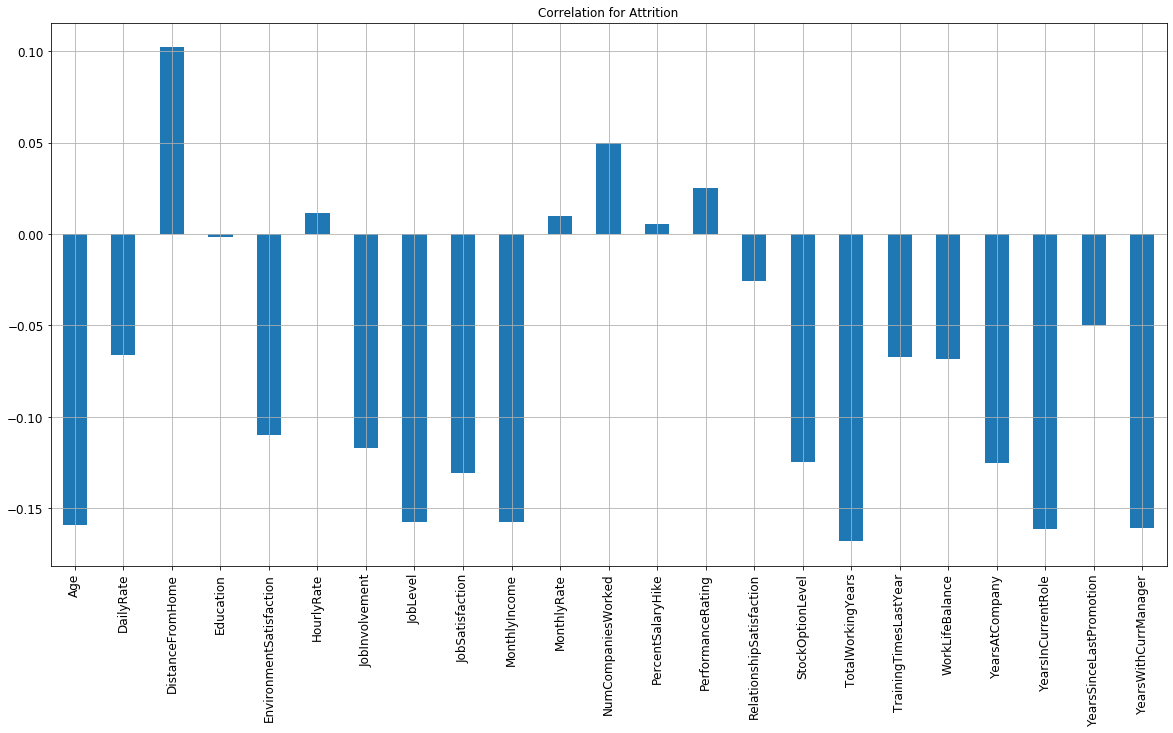

In [12]:
#Plotting continuous columns and their correlation values to Attrition in our employee df
cont_cols = ['Age','DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike',  'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'] 
data=df[cont_cols]

data.corrwith(df.Attrition).plot.bar(figsize = (20, 10),
                                     title = "Correlation for Attrition", fontsize = 12,
                                     rot = 90, grid = True)

## This correlation visualization confirms and elaborates upon many of our previous findings:
1. DistanceFromHome and NumCompaniesWorked are positively correlated with Attrition. 
2. Age, JobLevel, MonthlyIncome, TotalWorkingYears,YearsinCurrentRole, YearsAtCompany, StockOptionLevel and YearswithCurrManager were (highly) negatively correlated with attrition.
3. Education, HourlyRate, and MonthlyRate didn't have much of an impact on whether or not an employee leaves the company. 

# EDA Final Step: 
## Visualizing the categorical attributes for employees with an Attrition value = 1

In [13]:
att_df = df[df['Attrition']==1] #creating a new dataframe consisting only of people who left the company
#brief exploratory data analysis will help guide the creation of our model

In [14]:
#for col in att_df.columns: #creating distributions for each column in our attrition == 1 dataset (df2)
#    figure = px.histogram(att_df, x=col) 
#    figure.show()

# Pie Charts that show attrition by Education Field, Education, YearsInCurrRole, StockOptionLevel,YearsSinceLastPromotion and YearsWithCurrManager, respectively

In [15]:
pie_fig = px.pie(att_df,'EducationField',title='Attrition by Education Field') #pie chart of which education fields people are commonly bailing out of
pie_fig.show() #Life Sciences are a majority

att_ed = px.pie(att_df,'Education',title='Attrition by Education level') 
att_ed.show()

att_yicr=px.pie(att_df,'YearsInCurrentRole',title ='Attrition by Years In Current Role')
att_yicr.show()


att_stockoptlev=px.pie(att_df,'StockOptionLevel',title ='Attrition by Stock Option Level')
att_stockoptlev.show()

att_yslp = px.pie(att_df,'YearsSinceLastPromotion',title='Attrition by Years Since Last Promotion')
att_yslp.show()

att_ywcm = px.pie(att_df,'YearsWithCurrManager',title='Attrition by Years With Current Manager')
att_ywcm.show()

- 37% of those with an Attrition score = 1 come from the Life Sciences Field followed by Medical

-  41.6% of those with an Attrition score = 1 have an educational level = 3, followed by 25.4% of employees with a education level = 4

- ~ 60% of those with an Attrition score = 1 have spent between 0-2 years in their current role. Since there are 14 different categories for this variable, some of the higher values (8-15 years) will need to be collapsed, in order to generate stronger association rules.

- An Overwhelming majority (64.3%) of employees who have shown attrition have a stock option level = 0 followed by 23% with a stock option level = 1!


- 47.6% of employees who have left the company have had zero years since their last promotion. This is followed by 22.2% of employees who have had 1 year since their last promotion. 


- 36.2% of employees who have shown attrition have spent less than a year with their current manager. This is followed by 23.2% of employees who have only spent up to two years with their current manager!

### Key Takeaways:
 - The more years employees spend in their current role, the less likely they are to show attrition!

 - Your Stock OptionLevel is an extremely good indicator of whether or not an employee leaves the company. Getting derivative options of  company stock may serve as an incentive for an employee to keep working in the company. If you don't have any shares, you have less to lose by leaving, it seems. 
 - Spending more time with your current manager usually means that you are less likely to leave the company. 

# Data Preparation: 
## Discretizing numerical attributes: used to prepare the df for association rules
Continuous numerical variables were binned and float64 types were manipulated using the as.type('category') function
Categorical variables with string data types were not included in this data preparation step

- Each discretized group is limited to either 3 or 4 bins. This will help us in developing a model that generates more generalizeable rules. If there are too many categories, the support will be too low to derive appropriate insights. 
- The pie charts of our subsetted (attrition=1) data set above illustrate this idea. YearsAtCompany for example has too much variance to carry utility in our models. 

In [16]:
#need qcut and cut to discretize numerical variables that can be converted into a transactional dataset
df['Age_grp'] = pd.qcut(df.Age, 3, labels = ['young','middle-aged','old'])
df['DailyRate_grp'] = pd.qcut(df.DailyRate, 3, labels = ['low_daily_rate','medium_daily_rate','high_daily_rate'])
df['DistFromHome_grp'] = pd.qcut(df.DistanceFromHome, 4, labels = ['walking_dist_commute', 'short_dist_commute', 'mid_dist_commute', 'long_dist_commute'])
df['HourlyRate_grp'] = pd.qcut(df.HourlyRate,3,labels=['low_hourly_rate','med__hourly_rate','high_hourly_rate'])
df['MonthlyIncome_grp'] = pd.qcut(df.MonthlyIncome, 3, labels=['low_monthly_inc','med_monthly_inc','high_monthly_inc'])
df['MonthlyRate_grp'] = pd.qcut(df.MonthlyRate, 3, labels=['low_monthly_rate','med_monthly_rate','high_monthly_rate'])
df['PercentSalaryHike_grp'] = pd.qcut(df.PercentSalaryHike, 4, labels=['small_sal_hike','med_sal_hike','moderate_sal_hike','large_sal_hike'])
df['TotalWorkingYears_grp'] = pd.qcut(df.TotalWorkingYears, 3, labels=['low_experience','mild_experience','high_experience'])
df['NumCompaniesWorked_grp'] = pd.qcut(df.NumCompaniesWorked, 3,labels = ['few_comps','mid_comps','many_comps'])
df['YearsAtCompany_grp'] = pd.qcut(df.YearsAtCompany, 3, labels=['fresh_worker','mod_worker','experienced_worker'])
df['YearsInCurrentRole_grp'] = pd.qcut(df.YearsInCurrentRole, 3, labels=['new_to_role', 'comfortable_in_role', 'experienced_in_role'])
df['YearsSinceLastPromotion_grp'] = pd.cut(df.YearsSinceLastPromotion, 3,labels=['recently_promoted','mod_time_since_promoted','long_time_since_promoted'])
df['YearsWithCurrManager_grp'] = pd.qcut(df.YearsWithCurrManager, 3,labels=['rec_assigned','assigned_for_some_time','assigned_long_time'])


df['Education_grp'] = df.Education.astype('category')
df['EnvSat_grp'] = df.EnvironmentSatisfaction.astype('category')
df['PerformanceRating_grp'] = df.PerformanceRating.astype('category')
df['RelationshipSatisfaction_grp'] = df.RelationshipSatisfaction.astype('category')
df['StockOptionLevel_grp'] = df.StockOptionLevel.astype('category')
df['TrainingTimesLastYear_grp'] = df.TrainingTimesLastYear.astype('category')
df['WorkLifeBalance_grp'] = df.WorkLifeBalance.astype('category')

# Data Preparation (Continued):
The dataframe needs to be converted into a string dtype, initially, so we can use the strip function to populate our second df. The grouped attributes will remain in df2 while the continuous numerical columns will be dropped after df2 has been converted back into an object. A final dataframe, df3 ,will be populated using the format: (str(col)+'=' for col in df2) group = binned category for each instance. 
### These steps are crucial for generating frequency itemsets and transactional datasets that are prepared for association rules mining.

In [17]:
#Prepare Dataset for Association Rule Mining
df = df.astype('str') #so we can use x.str.strip(to populate our grouped dataframes in the future)

df[df.columns] = df.apply(lambda x: x.str.strip()) #stripping all of the columns that have strings
df2 = df.astype('object') #changing the df into an object so we can drop specific columns
df2 = df.drop([ 'Age', 'DistanceFromHome',  'DailyRate', #dropping all of the columns that we have already discretized
                'HourlyRate',  'MonthlyIncome',
                'MonthlyRate', 'PercentSalaryHike',
                'TotalWorkingYears', 'NumCompaniesWorked',
                'YearsAtCompany', 'YearsInCurrentRole',
                'YearsSinceLastPromotion', 'YearsWithCurrManager',
                'WorkLifeBalance', 'TrainingTimesLastYear','StockOptionLevel',
                'RelationshipSatisfaction','PerformanceRating',
                'EnvironmentSatisfaction','Education'], axis=1)

df3 = pd.DataFrame({col: str(col)+'=' for col in df2}, index=df2.index) + df2.astype(str) #creating a new df that grabs
#each column name(str) and outputs the value + = the grouped value(str) in our new dataframe 
df3.head(5)

Attrition                BusinessTravel  \
0  Attrition=0  BusinessTravel=Travel_Rarely   
1  Attrition=0  BusinessTravel=Travel_Rarely   
2  Attrition=0  BusinessTravel=Travel_Rarely   
3  Attrition=0     BusinessTravel=Non-Travel   
4  Attrition=0  BusinessTravel=Travel_Rarely   

                          Department                EducationField  \
0                   Department=Sales  EducationField=Life Sciences   
1  Department=Research & Development  EducationField=Life Sciences   
2                   Department=Sales        EducationField=Medical   
3  Department=Research & Development        EducationField=Medical   
4  Department=Research & Development  EducationField=Life Sciences   

          Gender    JobInvolvement      JobLevel  \
0    Gender=Male  JobInvolvement=3  JobLevel=2.0   
1  Gender=Female  JobInvolvement=3  JobLevel=2.0   
2  Gender=Female  JobInvolvement=2  JobLevel=2.0   
3    Gender=Male  JobInvolvement=2  JobLevel=4.0   
4  Gender=Female  JobInvolvement=2  JobLevel=3.0   

                             JobRole    JobSatisfaction  \
0            JobRole=Sales Executive  JobSatisfaction=3   
1      JobRole=Laboratory Technician  JobSatisfaction=3   
2            JobRole=Sales Executive  JobSatisfaction=3   
3  JobRole=Healthcare Representative  JobSatisfaction=2   
4  JobRole=Healthcare Representative  JobSatisfaction=2   

            MaritalStatus      OverTime              Age_grp  \
0   MaritalStatus=Married   OverTime=No        Age_grp=young   
1   MaritalStatus=Married   OverTime=No          Age_grp=old   
2    MaritalStatus=Single   OverTime=No          Age_grp=old   
3  MaritalStatus=Divorced  OverTime=Yes          Age_grp=old   
4    MaritalStatus=Single   OverTime=No  Age_grp=middle-aged   

                     DailyRate_grp                    DistFromHome_grp  \
0    DailyRate_grp=high_daily_rate  DistFromHome_grp=long_dist_commute   
1    DailyRate_grp=high_daily_rate   DistFromHome_grp=mid_dist_commute   
2     DailyRate_grp=low_daily_rate   DistFromHome_grp=mid_dist_commute   
3     DailyRate_grp=low_daily_rate   DistFromHome_grp=mid_dist_commute   
4  DailyRate_grp=medium_daily_rate  DistFromHome_grp=long_dist_commute   

                    HourlyRate_grp                   MonthlyIncome_grp  \
0  HourlyRate_grp=high_hourly_rate   MonthlyIncome_grp=med_monthly_inc   
1  HourlyRate_grp=high_hourly_rate   MonthlyIncome_grp=low_monthly_inc   
2  HourlyRate_grp=med__hourly_rate   MonthlyIncome_grp=med_monthly_inc   
3   HourlyRate_grp=low_hourly_rate  MonthlyIncome_grp=high_monthly_inc   
4  HourlyRate_grp=high_hourly_rate  MonthlyIncome_grp=high_monthly_inc   

                     MonthlyRate_grp                    PercentSalaryHike_grp  \
0   MonthlyRate_grp=low_monthly_rate  PercentSalaryHike_grp=moderate_sal_hike   
1  MonthlyRate_grp=high_monthly_rate     PercentSalaryHike_grp=large_sal_hike   
2   MonthlyRate_grp=low_monthly_rate  PercentSalaryHike_grp=moderate_sal_hike   
3  MonthlyRate_grp=high_monthly_rate  PercentSalaryHike_grp=moderate_sal_hike   
4  MonthlyRate_grp=high_monthly_rate     PercentSalaryHike_grp=large_sal_hike   

                   TotalWorkingYears_grp             NumCompaniesWorked_grp  \
0   TotalWorkingYears_grp=low_experience  NumCompaniesWorked_grp=many_comps   
1  TotalWorkingYears_grp=mild_experience  NumCompaniesWorked_grp=many_comps   
2  TotalWorkingYears_grp=mild_experience  NumCompaniesWorked_grp=many_comps   
3  TotalWorkingYears_grp=high_experience   NumCompaniesWorked_grp=few_comps   
4  TotalWorkingYears_grp=mild_experience   NumCompaniesWorked_grp=few_comps   

                      YearsAtCompany_grp  \
0        YearsAtCompany_grp=fresh_worker   
1          YearsAtCompany_grp=mod_worker   
2          YearsAtCompany_grp=mod_worker   
3  YearsAtCompany_grp=experienced_worker   
4  YearsAtCompany_grp=experienced_worker   

                       YearsInCurrentRole_grp  \
0          YearsInCurrentRole_grp=new_to_role   
1          YearsInCurrentRo

## Melting the dataframe:
This is similar to a pivot table in that it reshapes the df into a format where attributes are identifiers and the second column corresponds to the frequency value of each attribute.
Thus, we can obtain the counts of each group which consequently gives us the format (variable --> frequency value: Attrition=0, freq = 991) in the order of df3.
Following this, we create a pandas Dataframe that will be used to generate our association rules.

In [18]:
melted_data = pd.melt(df3) 
melted_data.head() 
frequency = melted_data.groupby(by=['value'])['value'].count().sort_values(ascending=False)
frequency.head() 

value
YearsSinceLastPromotion_grp=recently_promoted    1012
Attrition=0                                       991
PerformanceRating_grp=3.0                         985
BusinessTravel=Travel_Rarely                      839
OverTime=No                                       839
Name: value, dtype: int64

### Cursory Insights from Frequency 
- Recently promoted employees dominate this dataframe which will translate to a large support value as well 
- 991/1176 employees ended up not leaving the company 
- A Performance Rating of 3 seems to be a very saturated itemset. Investigating the quality of these performance ratings could lead to more interesting findings
- Finally, a large majority of employees travel rarely, and coincidentally the same number of employees do not work overtime hours at this company. It may be interesting to see the overlap between the two aformentioned columns to see if there is any correlation

In [19]:
freq_itemset = pd.DataFrame({'item':frequency.index, 'frequency':frequency.values})
freq_itemset.head(20) #displaying the 20 most frequent itemsets
#type(frequency) #this is a pandas Series
#type(freq_itemset)#while the freq_itemset is a DataFrame

item  frequency
0   YearsSinceLastPromotion_grp=recently_promoted       1012
1                                     Attrition=0        991
2                       PerformanceRating_grp=3.0        985
3                    BusinessTravel=Travel_Rarely        839
4                                     OverTime=No        839
5               Department=Research & Development        764
6                           WorkLifeBalance_grp=3        734
7                                     Gender=Male        694
8                                JobInvolvement=3        690
9           YearsWithCurrManager_grp=rec_assigned        562
10               NumCompaniesWorked_grp=few_comps        561
11                          MaritalStatus=Married        545
12             YearsInCurrentRole_grp=new_to_role        540
13                         StockOptionLevel_grp=0        500
14                                  Gender=Female        482
15                         StockOptionLevel_grp=1        482
16                   EducationField=Life Sciences        477
17                YearsAtCompany_grp=fresh_worker        471
18                                Education_grp=3        452
19                    TrainingTimesLastYear_grp=2        435

# Visualizing Frequent Itemsets using Seaborn and Plotly


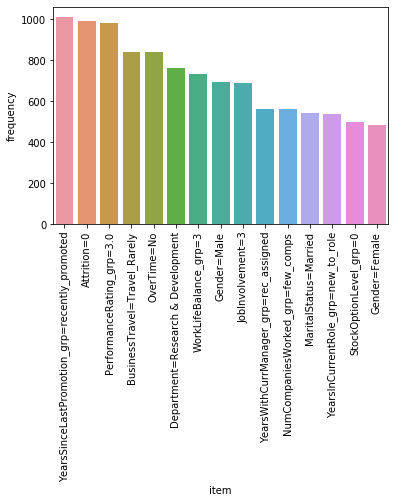

In [20]:
#Visualize Frequent Itemsets
g = sns.barplot(data=freq_itemset.head(15), x='item', y='frequency') #10 most freqent groups by frequency
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [21]:
#Visualize Frequent Itemsets
fig = px.bar(data_frame=freq_itemset.head(10), x='item',y='frequency',title='Bar Chart of the 10 most Frequent items in Employee Attrition data')
fig.show()

# Understanding Association Rule Mining:
(def:) ARM is one of the fundamental techniques used to detect and
extract useful information from large scale transactional data.
It has been utilized for recommender systems in the E-Commerce industry to suggest relavent products that suit a users transaction's history. 
It has also been used in Market Basket Analysis for determining which items are frequently purchased together. Although it's validity has been questioned and its roots seem apocryphal, the age-old example of ARM is it's utility in identifying the unexpected association between Beer and Diapers in Grocery stores. This would be an example of an unsupervised learning use case given that the tie between the two items is unexpected.
ARules have also been utilized in detecting patterns associated with fradulent credit card transactions which demonstrates the algorithms well-rounded applications across multiple industries. 
# Evaluation Metrics:
### Support is defined as the proportion of transactions which contain the itemset. This is simply a raw frequency percentage. 
\begin{align*}
support(x) = \frac{count(x)}{N}
\end{align*}
Support tells us, in general, how often an association rule can be applied in the first place.


Support is one of the key evaluation metrics for generating both supervised{RHS is specified for target classification} and unsupervised{unspecified RHS} association rules.

- An association Rule is simply an {If(X) Then(Y)} statement for transactional datasets where the antecedent can be any number of itemsets however the consequent is usually restricted to a single item.

### Confidence is essentially the conditional probability of finding the consequent{RHS} of the rule given that the transaction also contains the antecedent{LHS}.
Confidence is displayed as a percentage (or between 0 and 1) and it's value indicates the rule's reliability (How often Y co-occurs with X). By switching the order of X and Y we will generally observe assymetry (meaning direction has an impact) if the former rule has a high confidence value.

\begin{align*}
confidence(x \to y) = \frac{support(x,y)}{support(x)}
\end{align*}

If a rule is defined as [if{X}, then{Y}], then the proportion of transactions that contain X which also contain Y are defined as the confidence.

Confidence is important because it demonstrates that order matters when assesing the validity of an association rule.

For Example if the rule:

\begin{align*}
{pepporoni, dough, cheese} \to {sauce} 
\end{align*}

has a confidence of 0.1/0.1 = 1 then it means that 100% of transactions containing pepporoni, dough, and cheese also contain pasta sauce: This example works best if you think of the ingredients needed to make a pizza. A 100% confidence level obviously indicates a highly reliable rule.

### Lift is another key evaluation metric in determining how interesting a rule is. It is defined as the ratio of the observed support of the entire rule to that expected if X and Y were completely independent of eachother. 

#### Lift is essentially a normalized version of confidence.

\begin{align*}
lift(x \to y) = \frac{support(x,y)}{support(x) support(y)} = \frac{confidence(x \to y)}{support(y)}
\end{align*}


- If the rule had a lift = 1, this implied that the P({LHS}|{RHS}) are independent of each other. When lift = 1, no rule can be drawn between these two events.

- If the rule had a lift value that is > 1, that indicates the degree by which these two events are dependent on each other which is implicitly useful for predicting future consequents.

- If the rule had lift value that is < 1, that indicates that these tend to not occur together or that the items may potentially serve as substitutes for each other. 


- Higher lift values are indicative of stronger associations which is why it is similar to correlation.
#### Opposed to confidence, lift is symmetric since direction doesn't have an impact on our equation (first part)

# There are Two major Steps needed to Mine Association Rules: 
## 1. Frequent Itemset Generation
#### This step is where we find all itemsets in the dataframe that have a support value above a minimum specified constraint value. 
#### Frequent Itemset generation follows the A Priori principle: if an itemset is frequent, then all of its subset should also be frequent.
##### Note: Item set support, thus, never exceeds the support of the subsets that belong to it. Thus we 'prune' or cut off all of the infrequent itemsets.
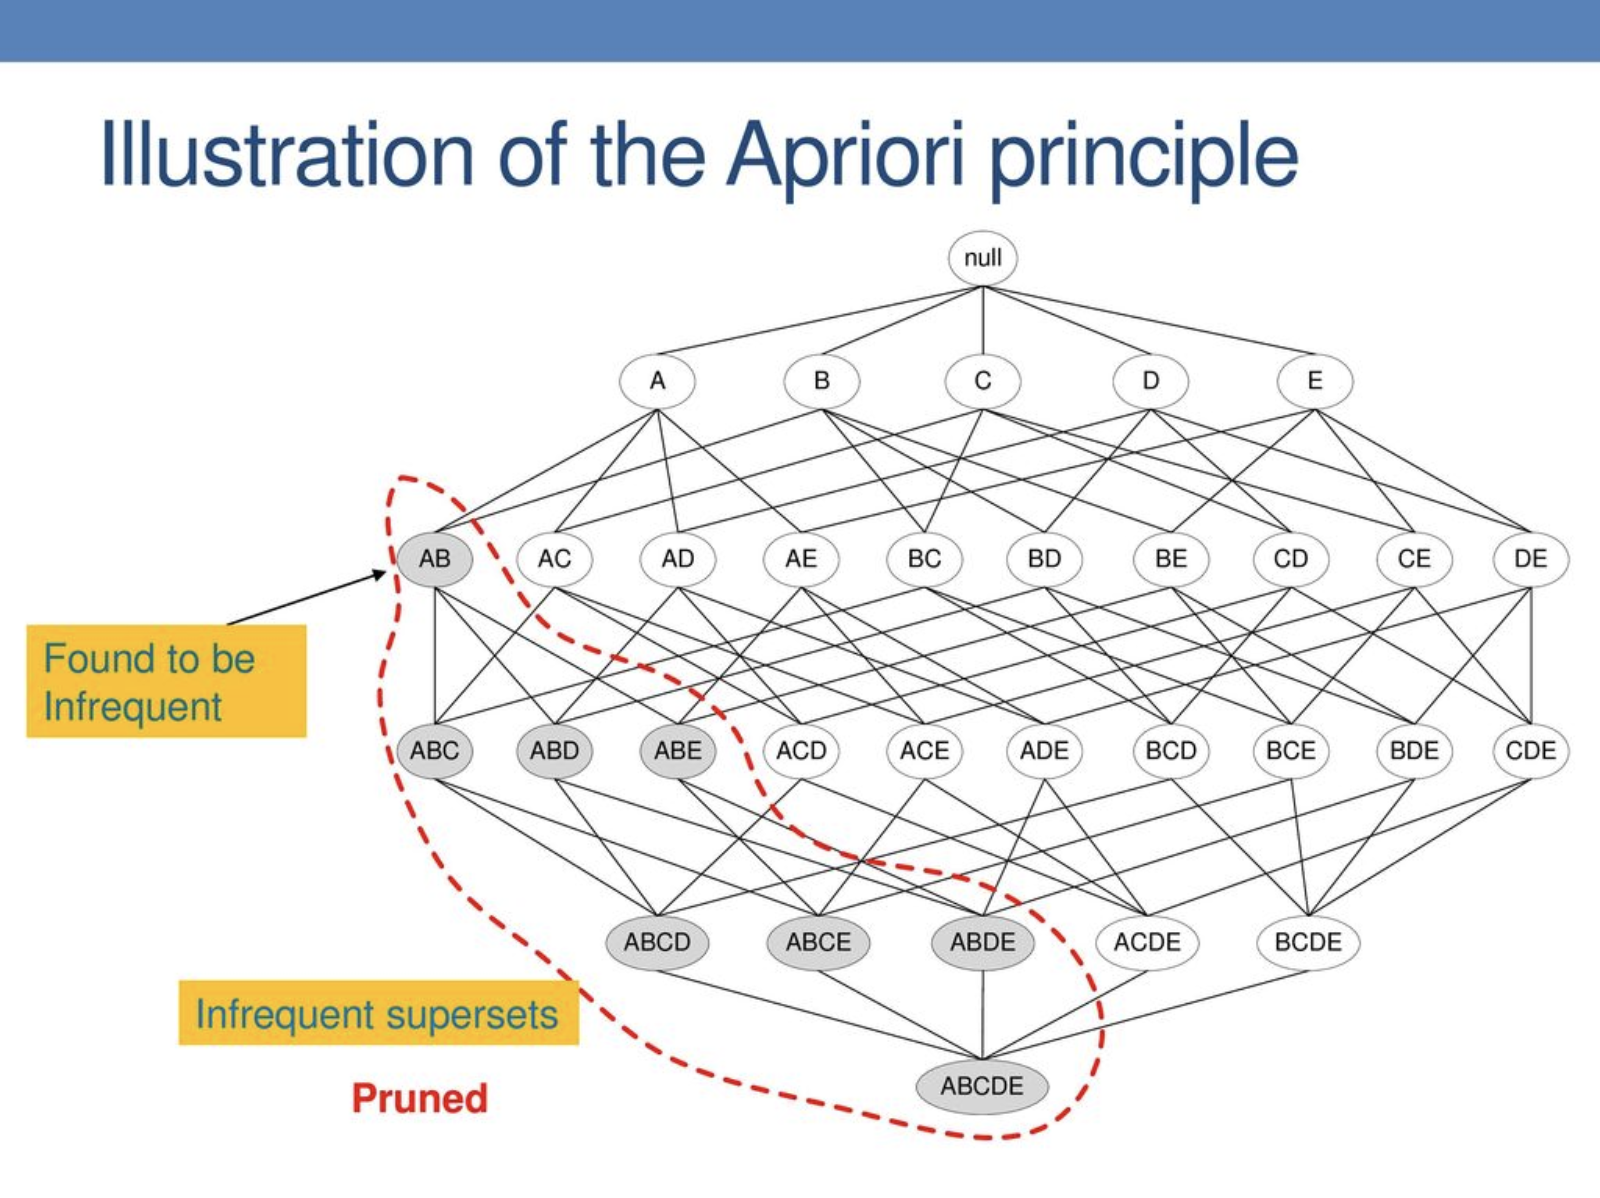
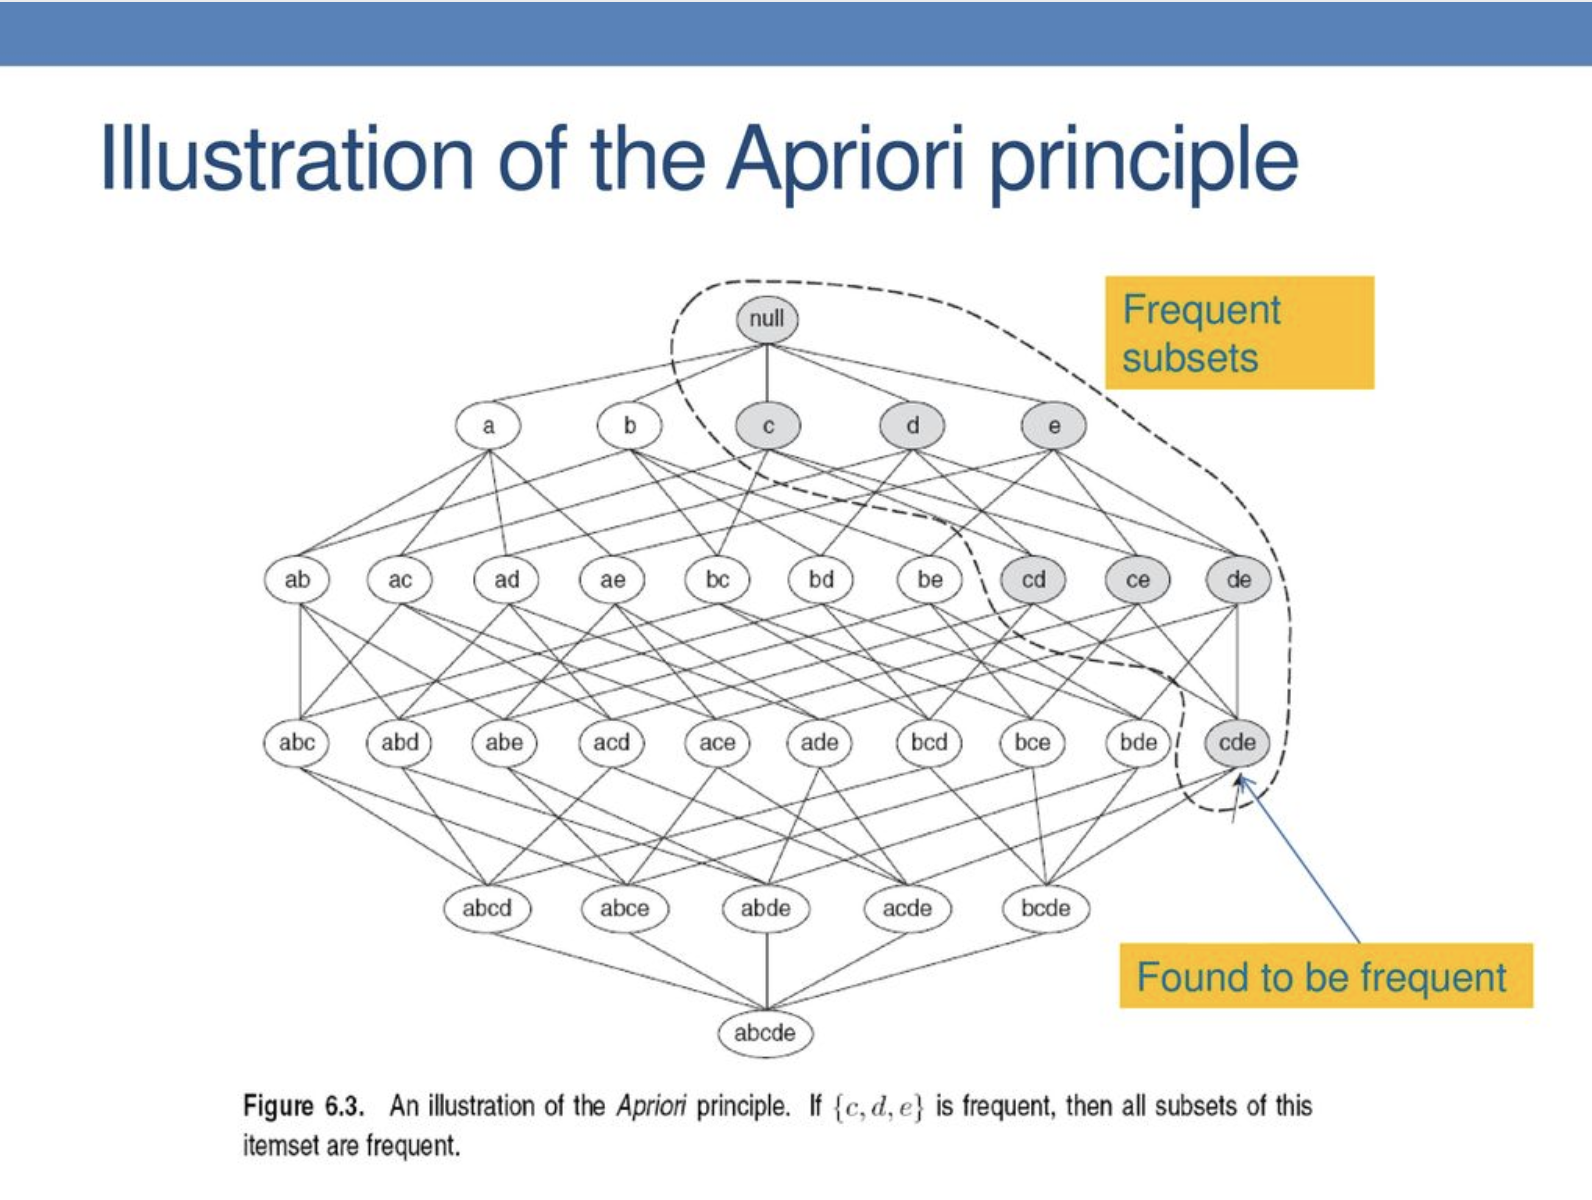
citation: https://slideplayer.com/slide/13192241/
### 2. Rule Generation
##### This step allows us to generate rules based on a minimum specifed confidence level via binary partition.
####  If an association rule’s confidence does not exceed the minimum specified confidence, there is no need to further explore all other rules from the same itemset due to it's computational intensity. This is what's known as the rule's heuristic. 

# The Limitations of ARM:
- Association rules are quite limited in the scope that we can only generate them with binned or categorical attributes.


This is a bottle-neck in the process since we have to discretize all continuous numerical attributes. 
I believe this dataset would be better suited for logistic regression or random forest classification. Logistic regression would allow us to leave the continuous numerical variables alone and we could output, based on their weights, a probability between 0 and 1 of an employee leaving the company after we split the data into training and testing sets. 


- If a categorical attribute has too many classes, we are going to be left with low-support/low-confidence association rules.


Categorical values with low counts may need to be collapsed based on their frequency distributions. That is why this process calls for a large amount of Exploratory Data Analysis/Visualization. 
- Association is similar to correlation in that it doesn't necessarily imply causation. 
- The model also needs to be tuned over numerous iterations in order to generate meaningful rules based on sampling bias and itemset support values
- If the rules we generate are very generic (low-lift = or < 1: not that surprising) then the model was a waste of time

# Running APriori with Apyori Library:
The following records will list each instance in df3 along with it's categorical grouping.
This step is similar to the creation of a sparse matrix during Market Basket Analysis. We are able to view each instance through the lens of which groups they are most tightly associated with in terms of support, confidence, lift and length.

In [22]:
records = [] #list comprehension that scans through each item/frequency
for i in range(0,len(df3)): #rows
    records.append([(df3.values[i,j]) 
                    for j in range(0, len(df3.columns))])
frequent_itemset = ap.apriori(records,
                              min_support=0.8,
                              min_confidence=0.8,
                              min_lift=1,
                              min_length=2)
results = list(frequent_itemset)

results[0:4]
#A list of EACH case with their groups
        #[['Attrition=0','age_grp=18-30','DailyRate_grp=1163-1500'],[Attrition=0,age_grp=44-50,dis=]]
        #ordered by item frequency
#results

[RelationRecord(items=frozenset({'Attrition=0'}), support=0.842687074829932, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Attrition=0'}), confidence=0.842687074829932, lift=1.0)]),
 RelationRecord(items=frozenset({'PerformanceRating_grp=3.0'}), support=0.8375850340136054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'PerformanceRating_grp=3.0'}), confidence=0.8375850340136054, lift=1.0)]),
 RelationRecord(items=frozenset({'YearsSinceLastPromotion_grp=recently_promoted'}), support=0.8605442176870748, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'YearsSinceLastPromotion_grp=recently_promoted'}), confidence=0.8605442176870748, lift=1.0)])]

# TransactionEncoder: utilizing this object allows us to transform our dataset into an array that's suitable for MLxtends API. 
## the fit( ) method allows te to learn the unique groupings associated with our dataset.
### the te.columns_ argument allows us to show the unique column names that correspond to the transaction's encoder array. This is transferred into a pandas DataFrame for the convenience of viewing/manipulating our frequent_itemsets. 
#### The df is then fed into the apriori algorithm where the minimum support value is specified as 50%
- meaning that in at least 50% of our data these itemsets occur. 

- This follows the A Priori principle in that if items aren't seen within a minimum specified support value, that they can be discarded since they don't offer any utility in the remainder of our heuristic rule generation's.

In [23]:
#Use Association Rules from Mlxtend Library
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets = pd.DataFrame(frequent_itemsets)
(frequent_itemsets) #35 itemsets

support                                           itemsets
0   0.842687                                      (Attrition=0)
1   0.713435                     (BusinessTravel=Travel_Rarely)
2   0.649660                (Department=Research & Development)
3   0.590136                                      (Gender=Male)
4   0.586735                                 (JobInvolvement=3)
5   0.713435                                      (OverTime=No)
6   0.837585                        (PerformanceRating_grp=3.0)
7   0.624150                            (WorkLifeBalance_grp=3)
8   0.860544    (YearsSinceLastPromotion_grp=recently_promoted)
9   0.612245        (BusinessTravel=Travel_Rarely, Attrition=0)
10  0.567177   (Attrition=0, Department=Research & Development)
11  0.503401                    (JobInvolvement=3, Attrition=0)
12  0.636054                         (OverTime=No, Attrition=0)
13  0.709184           (PerformanceRating_grp=3.0, Attrition=0)
14  0.537415               (WorkLifeBalance_grp=3, Attrition=0)
15  0.721939  (YearsSinceLastPromotion_grp=recently_promoted...
16  0.509354        (BusinessTravel=Travel_Rarely, OverTime=No)
17  0.602891  (PerformanceRating_grp=3.0, BusinessTravel=Tra...
18  0.615646  (YearsSinceLastPromotion_grp=recently_promoted...
19  0.539116  (PerformanceRating_grp=3.0, Department=Researc...
20  0.562925  (YearsSinceLastPromotion_grp=recently_promoted...
21  0.510204  (YearsSinceLastPromotion_grp=recently_promoted...
22  0.505102  (JobInvolvement=3, YearsSinceLastPromotion_grp...
23  0.596939           (PerformanceRating_grp=3.0, OverTime=No)
24  0.612245  (YearsSinceLastPromotion_grp=recently_promoted...
25  0.518707  (PerformanceRating_grp=3.0, WorkLifeBalance_gr...
26  0.721088  (PerformanceRating_grp=3.0, YearsSinceLastProm...
27  0.539116  (WorkLifeBalance_grp=3, YearsSinceLastPromotio...
28  0.518707  (PerformanceRating_grp=3.0, BusinessTravel=Tra...
29  0.528061  (YearsSinceLastPromotion_grp=recently_promoted...
30  0.531463  (PerformanceRating_grp=3.0, OverTime=No, Attri...
31  0.545068  (YearsSinceLastPromotion_grp=recently_promoted...
32  0.610544  (PerformanceRating_grp=3.0, YearsSinceLastProm...
33  0.519558  (PerformanceRating_grp=3.0, YearsSinceLastProm...
34  0.511054  (PerformanceRating_grp=3.0, YearsSinceLastProm...

### Rules 9-34 include groupings of at least two or more itemsets
- (BusinessTravel=Travel_Rarely, Attrition=0) support = 0.612245
- (Department=Research & Development, Attrition=0) = 0.567177
### Again, the only specification for these frequent itemsets is that support is at least 0.5 or greater. This aligns with the idea that multiple itemsets fall closer to the bottom of our list.

# Generating Association Rules for our Baseline Model:

In [24]:
frequent_itemsets.sort_values(by='support',ascending=False).head(10)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[(rules['lift']>1) & (rules['confidence'] > 0.8)].head(10) #confidence must be at least greater than 80% and lift must be greater than 1 in order to imply correlation
#len(rules)

antecedents  \
0        (BusinessTravel=Travel_Rarely)   
3   (Department=Research & Development)   
4                    (JobInvolvement=3)   
6                         (OverTime=No)   
8           (PerformanceRating_grp=3.0)   
9                         (Attrition=0)   
10              (WorkLifeBalance_grp=3)   
15       (BusinessTravel=Travel_Rarely)   
17       (BusinessTravel=Travel_Rarely)   
19  (Department=Research & Development)   

                                        consequents  antecedent support  \
0                                     (Attrition=0)            0.713435   
3                                     (Attrition=0)            0.649660   
4                                     (Attrition=0)            0.586735   
6                                     (Attrition=0)            0.713435   
8                                     (Attrition=0)            0.837585   
9                       (PerformanceRating_grp=3.0)            0.842687   
10                                    (Attrition=0)            0.624150   
15                      (PerformanceRating_grp=3.0)            0.713435   
17  (YearsSinceLastPromotion_grp=recently_promoted)            0.713435   
19  (YearsSinceLastPromotion_grp=recently_promoted)            0.649660   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.842687  0.612245    0.858164  1.018367  0.011042    1.109122  
3             0.842687  0.567177    0.873037  1.036015  0.019717    1.239042  
4             0.842687  0.503401    0.857971  1.018137  0.008968    1.107611  
6             0.842687  0.636054    0.891538  1.057970  0.034852    1.450391  
8             0.842687  0.709184    0.846701  1.004763  0.003362    1.026180  
9             0.837585  0.709184    0.841574  1.004763  0.003362    1.025180  
10            0.842687  0.537415    0.861035  1.021774  0.011452    1.132036  
15            0.837585  0.602891    0.845054  1.008917  0.005328    1.048201  
17            0.860544  0.615646    0.862932  1.002775  0.001704    1.017421  
19            0.860544  0.562925    0.866492  1.006912  0.003864    1.044551

## Interpreting a few baseline Unsupervised Association rules

- index:1 ((BusinessTravel=Rarely)->(Attrition=0)) 

- lift ==  1.018367

The meaning of this is that when an employee travels rarely, the probability that they don't end up leaving the company is increased by 0.18%. Since lift is symmetrical (order doesn't matter) the reverse is also true.

- Confidence = 0.0.858164 meaning that there is an 86% chance an employee does not show attrition given that they do not travel very much 

- Support = 0.612245 meaning that 61% of the time these itemsets are associated with one another






- index:6 ((Overtime=No)->(Attrition=0))

- lift == 1.057970

The meaning of this is that when an employee doesn't work overtime hours, the probability that they don't end up leaving the company is increased by 5.8%. Since lift is symmetrical (order doesn't matter) the reverse is also true.

- Confidence = 0.891538 meaning that there is an 89% chance an employee does not show attrition given that they do not work overtime. 
- Support = 0.636054 meaning that 63% of the time these itemsets are associated with one another


- index: 15((Business_Travel = Rarely)->(PerformanceRating_grp = 3)

- lift == 1.008917 

The meaning of this is that when an employee doesn't travel much, the probability that they have a performance group rating of 3 is increased by 0.89%.

- Confidence = 0.845054 meaning that there is ~ an 85% chance an has a performance group rating of 3 given that they travel much. The order does matter here.  
- Support = 0.837585 meaning that 84% of the time these itemsets are associated with one another


## Plotting our baseline Association Rules using Seaborn and Plotly, respectively

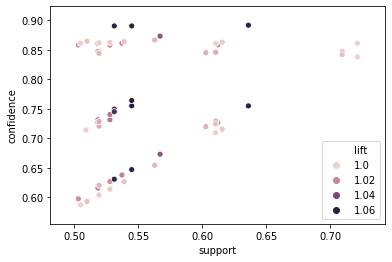

In [25]:
b = sns.scatterplot(data=rules,x='support',y='confidence',hue='lift')
plt.show()
fig = px.scatter(data_frame=rules,
                 x='support',y='confidence',
                 color='lift', title='Scatterplot for 60 Association Rules')
fig.show()

# Scatter Plot Interpretaion: 
- We would like to see values with the highest lift and confidence values in order to determine a rules reliability and uniqueness. 
- One could argue that high support is crucial to for discovering certain rules, however once we transition to a supervised model where our target consequent makes up only a small portion of the data, the support value will inevitably drop. 

- If we had an equal number of cases where employees either stay or leave the company, then our attention would be drawn to the upper right hand corner of the scatter plot. 

- Since we do not, I think we can harvest the most meaningful insights from the upper left-mid region of the gridded plot where lift values (yellow) are high once we transition to our supervised model for attrition cases = 1. 

# Unsupervised Association Rules interpretation:

### Preliminary Remarks
Our initial model has generated a considerable number of rules that lead to an attrition value of 0, meaning that the employee stays with the company. The goal of this project is to also investigate rules where the antecedent leads to employee attrition.

Due to only 16% of our data actually including cases of attrition, we are faced with the issue of sampling bias. In order to circumnavigate this, we must tune the hyperparamters of our model so that the consequent is {(Attrition =1), and the support/confidence values are high enough to still generate a number meaningful rules.

They must, however, be low enough to represent the frequency of attrition being equal to 1 in our transactional data in the first place. This idea will be embellished upon in the subsequent tuning/analysis.

The rules with the highest lift values will end up being the most meaningful in our evaluation of factors that lead to attrition in this company, given that they can show the increased probability of itemset dependence given that lift is above 1. 

Setting our baseline model at a confidence level of 80% seems to generate just enough rules so that we still have the potential for meaningful analysis. 

# Transitioning to a Supervised Apriori Model:
#### After seeing the performance of our unsupervised baseline model, now would be an appropriate time to apply a supervised model to the lens of our data. This simply allows us to filter rules by the desired consequent or RHS value. 

- The major drawback of this is that we must iteratively tune our model so that it can return an appropriate number of meaningful rules.

- Our consequent will be Attrition (whether it is 0 or 1) and the antecedents will be any number of itemsets that satisfy our constraint values for each of the key evaluation metrics.

In [26]:
#Supervised Classification with Association Rule Mining
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filtered according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)

In [27]:
# I will start with a baseline support of 50%, confidence of 80% and a minimum lift of one in order to illustrate co-dependence
unadjusted_rules = SupervisedApriori(data=df,consequent = [('Attrition=0')],
min_supp=0.5, min_conf=0.8, min_lift=1).sort_values(by='support',ascending=False)
unadjusted_rules

antecedents    consequents  \
4                         (PerformanceRating_grp=3.0)  (Attrition=0)   
3                                       (OverTime=No)  (Attrition=0)   
0                      (BusinessTravel=Travel_Rarely)  (Attrition=0)   
10  (PerformanceRating_grp=3.0, YearsSinceLastProm...  (Attrition=0)   
1                 (Department=Research & Development)  (Attrition=0)   
9   (YearsSinceLastPromotion_grp=recently_promoted...  (Attrition=0)   
5                             (WorkLifeBalance_grp=3)  (Attrition=0)   
8            (PerformanceRating_grp=3.0, OverTime=No)  (Attrition=0)   
7   (YearsSinceLastPromotion_grp=recently_promoted...  (Attrition=0)   
6   (PerformanceRating_grp=3.0, BusinessTravel=Tra...  (Attrition=0)   
2                                  (JobInvolvement=3)  (Attrition=0)   

    antecedent support  consequent support   support  confidence      lift  \
4             0.837585            0.842687  0.709184    0.846701  1.004763   
3             0.713435            0.842687  0.636054    0.891538  1.057970   
0             0.713435            0.842687  0.612245    0.858164  1.018367   
10            0.721088            0.842687  0.610544    0.846698  1.004760   
1             0.649660            0.842687  0.567177    0.873037  1.036015   
9             0.612245            0.842687  0.545068    0.890278  1.056475   
5             0.624150            0.842687  0.537415    0.861035  1.021774   
8             0.596939            0.842687  0.531463    0.890313  1.056517   
7             0.615646            0.842687  0.528061    0.857735  1.017857   
6             0.602891            0.842687  0.518707    0.860367  1.020980   
2             0.586735            0.842687  0.503401    0.857971  1.018137   

    leverage  conviction  
4   0.003362    1.026180  
3   0.034852    1.450391  
0   0.011042    1.109122  
10  0.002892    1.026164  
1   0.019717    1.239042  
9   0.029137    1.433738  
5   0.011452    1.132036  
8   0.028430    1.434204  
7   0.009264    1.105772  
6   0.010659    1.126615  
2   0.008968    1.107611

### This model performed very similarly to our unsupervised baseline model, although in the initial model, our consequent was not specified. 
- In order to develop more significant rules, I will slowly raise the support above 0.8 in order to obtain slightly more reliable rules. 
- The highest support for these unadjusted rules fall between 0.5 and 0.7 which is why I will iteratively play with this value until the support is optimized. This is acceptable because our consequent (Attrition = 0) dominated this data set. It's absolute limit (consequent support) will be 0.842687 given that this is the raw frequency percentage of cases. 
- I would like to leave the lift value alone but I will sort the model according to lift to stress how unique the rule is.
- Overall I think this is an excellent start to our derivation of significant rules for non-attrition cases.

# MODEL HYPERPARAMETERIZATION and TUNING

Overfitting the model may occur if the  minimum key constraints for our evaluaution metrics are set too high. The model would consequently return only values that represent a very large portion of the itemsets. Overfitting also results in the elimination of too many rules which compromises our ability in finding interesting associations with high lift. 


By the same token, underfitting occurs when support and confidence values are set too low. Although they may return more interesting association rules, if the frequency of these cases is too low, the model won't end up scaling to larger populations which is where its analytical value diminishes.


## Running our association rule mining algorithm with adjusted evaluation constraints:
- The model below was iteratively tuned until support and confidence were optimized. 
- For our RHS, I wanted to stress extremely reliable, and common associations between it and our antecedents.
- I wanted to keep support low enough that our model could be scalable across most employees. 

# Top 5 rules which predict those who stay at the company

In [28]:
adj_rules = SupervisedApriori(data=df,consequent = [('Attrition=0')],
min_supp=0.52, min_conf=0.86, min_lift=1).sort_values(by=['confidence','lift','support'],ascending=False)
pd.set_option('display.max_colwidth', None)
adj_rules.head(5)

antecedents  \
1                                                 (OverTime=No)   
3                      (PerformanceRating_grp=3.0, OverTime=No)   
4  (YearsSinceLastPromotion_grp=recently_promoted, OverTime=No)   
0                           (Department=Research & Development)   
2                                       (WorkLifeBalance_grp=3)   

     consequents  antecedent support  consequent support   support  \
1  (Attrition=0)            0.713435            0.842687  0.636054   
3  (Attrition=0)            0.596939            0.842687  0.531463   
4  (Attrition=0)            0.612245            0.842687  0.545068   
0  (Attrition=0)            0.649660            0.842687  0.567177   
2  (Attrition=0)            0.624150            0.842687  0.537415   

   confidence      lift  leverage  conviction  
1    0.891538  1.057970  0.034852    1.450391  
3    0.890313  1.056517  0.028430    1.434204  
4    0.890278  1.056475  0.029137    1.433738  
0    0.873037  1.036015  0.019717    1.239042  
2    0.861035  1.021774  0.011452    1.132036

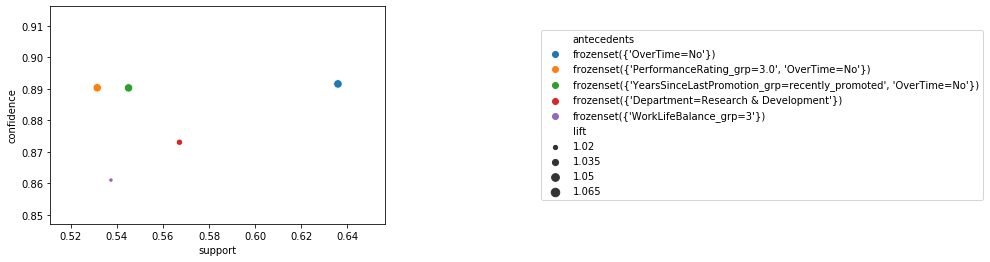

In [29]:
fig, ax1 = plt.subplots(1,1)
sup_plot = sns.scatterplot(data=adj_rules,x='support',y='confidence',hue='antecedents',size='lift', ax=ax1)
box = sup_plot.get_position()
sup_plot.set_position([box.x0, box.y0, box.width, box.height])
sup_plot.legend(loc='center right', bbox_to_anchor=(2.8, 0.5), ncol=1)
plt.show()
#The above code was used as a standard template from Patrick Prioletti, after being granted his permission. 

# INTERPRETATIONS: Why are these rules considered to be significant?
- Our most significant rules for Attrition = 0 were sorted by confidence, lift and support, respectively 
- I did this to ensure that rules were highly reliable even if they weren't as common throughout the data set. 

Employees that didn't work overtime proved to be the most reliable rule in predicting non-attrition. 89% of the time, an employee that didn't work overtime hours ended up remaining at the company. This trend becomes quite apparent in a few of the remaining rules. 

Employees that didn't work overtime and had a performance rating of 3 were also amongst the most reliable rules for predicting non-attrition. I wanted to prevent overfitting in the model by keeping the support value high enough so that the rule could be generalizeable to most employees. Having a high confidence specification also allowed us to examine rules in the particular order that leads to correlation. 

Moving on, if an employee didn't work overtime and was recently promoted, they reliably proved to stay at the company (89% of the time). This combination of antecedents also increased their probability of staying in the company by 5.6%.

The fourth rule isn't as interesting as I would like it to be givein that ~65% of the company belongs to the research and development field, which suggest for this rule that the model was underfit in this case. 

A worklife balance rating of 3 proved to be our least interesting rule, given it's underwhelming lift, confidence and support relative to the other data points. 

# Tuning our supervised model for predicting employee attrition:

In [30]:
unadjusted_att_rules = SupervisedApriori(data=df,consequent = [('Attrition=1')],
min_supp=0.5, min_conf=0.8, min_lift=1).sort_values(by=['support'],ascending=False)

unadjusted_att_rules

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

- Before tuning our attrition model, it makes sense that the aforementioned constraint values will not lead to any output. In order to generate rules, the support value needs to fall slightly below the minimum amount of times that the consequent proportionally appears in our dataset. Thus support should be reduced between 0.1 and 0.16.

- By the same token, confidence must also be reduced to a comparable value.

# Top 5 rules which predict those who leave the company

In [31]:
adj_att_rules = SupervisedApriori(data=df,consequent = [('Attrition=1')],
min_supp=0.1, min_conf=0.16, min_lift=1.02).sort_values(by=['confidence','lift'],ascending=False)
pd.set_option('display.max_columns', None)
adj_att_rules

antecedents  \
0                                                                (StockOptionLevel_grp=0)   
1                                                    (YearsInCurrentRole_grp=new_to_role)   
4  (YearsSinceLastPromotion_grp=recently_promoted, YearsWithCurrManager_grp=rec_assigned)   
3                                                 (YearsWithCurrManager_grp=rec_assigned)   
2                                         (YearsSinceLastPromotion_grp=recently_promoted)   

     consequents  antecedent support  consequent support   support  \
0  (Attrition=1)            0.425170            0.157313  0.101190   
1  (Attrition=1)            0.459184            0.157313  0.102891   
4  (Attrition=1)            0.465986            0.157313  0.100340   
3  (Attrition=1)            0.477891            0.157313  0.101190   
2  (Attrition=1)            0.860544            0.157313  0.138605   

   confidence      lift  leverage  conviction  
0    0.238000  1.512908  0.034306    1.105889  
1    0.224074  1.424384  0.030656    1.086041  
4    0.215328  1.368791  0.027034    1.073936  
3    0.211744  1.346004  0.026012    1.069052  
2    0.161067  1.023865  0.003231    1.004475

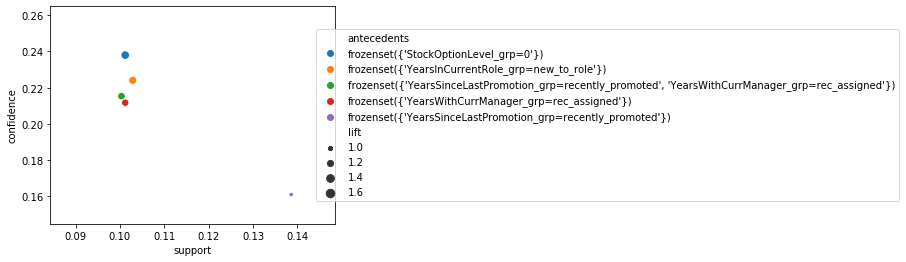

In [32]:
fig = plt.subplots(1,1)
sup_plot = sns.scatterplot(data=adj_att_rules,x='support',y='confidence',hue='antecedents',size='lift')
box = sup_plot.get_position()
sup_plot.set_position([box.x0, box.y0, box.width * 0.85, box.height])
sup_plot.legend(loc='center right', bbox_to_anchor=(3, 0.5), ncol=1)
plt.show()

#The above code was used as a standard template from Patrick Prioletti, after being granted his permission. 

## INTERPRETATIONS: Why are these rules considered to be significant when determining employee attriton?

- Although support values for the following rules were extremely low (to compensate for attrition actually occuring), antecedent support lingered between 40%-50% generally. Thus I don't think this model was underfitting. It was at least  generalizeable across about half of the company. The lowered confidence value was also necessary for adjusting to the sampling bias of our desired consequent. 

- I was really going for rules with high lift values in this model. The lift constraint shows us the increased probability of the antecedents and consequents being correlated due to their association. 

- Evidently from our EDA, a StockOptionLevel rating of 0 was a common occurence that seemed to lead to attrition. The employees that fell into this group (~42%) were 51% more likely to show attrition than if these events were independent. This extremely high lift value is a practical derivation for one of our more interesting rules.

- Being newly assigned to your role at this company also played a large role in employee attrition. Again, the lift value indicates that employees were 42% more likely to leave the company, demonstrating the value of longevity in the companies ability to maintain its employees. 


- Recently promoted employees that were also recently assigned to a new manager also followed a similar trend even though they were only 34% more likely to leave the company. This is an unexpected and interesting rule. You would think that promotions would serve as incentive to stay at a company and keep advancing up the chain of command. Thus it would be interesting to investigate the benefits in, terms of percentsalaryhike, of actually being promoted at this company. It can be inferred that being recently assigned to a new manager highly increases the probability of an employee showing attrition at this company. Perhaps this is a problem with management. This exact concept is illustrated in the following rule.


# Conclusions and Key Takeaways:
   The best predictor of people staying at the company is when they aren't reported to work Overtime. This is an intuitive insight, but it's prevalence amongst throughout my association rules really seem to drive this point home. 

I think the real value in this analysis is derived from examining what antecedents lead to employees leaving the company. The fact that a stock option level of 0 for an employee increased their probability of showing attrition by over 50%(lift = 1.51), it's important that the company stresses the intrinsic value of having higher stock option levels in order to maintain it's employees. The more you are offered discounted opportunities to invest in the company, the more the more likely the employee is to keep working to ensure that it's benefits are sowed. Management at this company could potentially leverage the discounted benefits of stock options plans in order to optimize the companies own value, as well as the value that it's employees see in the company. A majority of actionable insights should be derived from the latter models (attrition = 1) developed throughout this project.  

If this company is allocating much of its resources to studying the association between attributes that are commonly associated with attrition (i.e. PayRate for example), they should instead focus on retaining workers younger workers who have only worked at a small number of different companies throughout their careers. As attributes such as; JobLevel, TotalWorkingYears, YearsinCurrentRole, YearsAtCompany, StockOptionLevel and YearswithCurrManager increased, the probability of an employee leaving the company seemed to diminish at a dramatic rate.  



# Final Thoughts
Many of these results were generic, uninsightful and intuitive at times. Transient workers, logically, have a higher probability of leaving given that they haven't put much effort into their workplace reputation and have less to lose by starting again at some other company. Dually, if workers have been recently assigned to work with a new manager, then they may not be suited for the role they are expected to fill, or they may not get along together.  

Most companies follow a Pareto distribution where 20% of the employees are responsible for 80% of the output. That means that this company should really hone in on those workers which bring the most value to the table. They can afford to lose younger workers who don't have that much experience given that they don't produce a large amount of value (even seemingly after being recently promoted). The company should focus on restructuring it's organizational chain of command in order to retain high quality employees the longest, while also making their ascension throughout the chain of command more appealing and accessible. 